In [1]:
# Change the Directory
import os
os.chdir("C:\\Users\\datam\\OneDrive\\Desktop\\python") # change as needed

# Verify the change
os.getcwd()

'C:\\Users\\datam\\OneDrive\\Desktop\\python'

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [4]:
# Load the dataset which was created in Notebook 3. Logistic Regresssion
df = pd.read_csv('santander_treated.csv')

## Do we have a collinearity problem?
### High correlation removed in the last notebook!
### Run the code that counts the number of non-zero values per column - Dummy those upon inspection

In [5]:
# Non-zero inspection
# Calculate non-zero counts for each column
non_zero_per_column = (df != 0).sum()
# Optional: To see it as a DataFrame with column names
non_zero_df = pd.DataFrame(non_zero_per_column, columns=['Non-Zero Count'])
non_zero_df.head()

,Non-Zero Count
var3,71012
var15,71192
imp_ent_var16_ult1,3718
imp_op_var40_comer_ult1,295
imp_op_var40_efect_ult1,38


In [6]:
df.shape

(71192, 124)

In [7]:
# need to trim out the sparse inputs
# First calculate a threshold based upon 0.5%
threshold = len(df) * 0.005
threshold

355.96

In [8]:
# Clean up the dataframe
columns_to_keep = non_zero_df[non_zero_df['Non-Zero Count'] > threshold].index.tolist()
df = df[columns_to_keep].copy()
df.shape

(71192, 55)

In [ ]:
# Remove highly correlated features
# Correlation and high correlation removal
#df_corr = X.corr().abs()  # Use absolute values
#threshold = 0.71  # Your cutoff

# Initialize list of columns to remove
#to_remove = set()

# Get upper triangle of correlation matrix (excluding diagonal)
#upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))

# Iterate through columns to find high correlations
#for col in upper.columns:
#    if col not in to_remove:  # Skip if already marked for removal
        # Find columns highly correlated with this one
 #       high_corr_cols = upper.index[upper[col] > threshold].tolist()
        # Add only those not yet marked for removal
 #       for corr_col in high_corr_cols:
 #           if corr_col not in to_remove:
#                to_remove.add(corr_col)  # Add one of the pair to remove
#                break  # Remove only one per pair, then move to next column
#b
# Convert to list for dropping
#to_remove = list(to_remove)
#print(f"Number of columns to remove: {len(to_remove)}")
#print(f"Columns being removed: {to_remove}")

# Remove the identified columns
#X_1 = X.drop(columns=to_remove)
#X_1.shape

In [9]:
# Create train/test split (70/30)
train, test = train_test_split(df, test_size=0.3, random_state=1066)
train.shape

(49834, 55)

In [10]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var41_efect_ult3,ind_var14,ind_var24_0,ind_var30_0,ind_var37_0,num_var4,num_var5_0,...,saldo_medio_var5_hace3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_ult1,var38,y
53874,2,32,0.0,120.0,0,0,1,0,2,3,...,129.30,0.0,0.0,0.0,0.0,0.00,0.0,0.0,44237.19,0
21717,2,24,0.0,0.0,0,0,1,0,0,3,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,393750.33,0
49405,2,37,0.0,0.0,0,0,1,0,2,3,...,13.74,0.0,0.0,0.0,0.0,128709.69,0.0,0.0,88030.08,0
40532,2,23,0.0,0.0,0,0,1,0,1,3,...,0.63,0.0,0.0,0.0,0.0,0.00,0.0,0.0,131262.03,0
61989,2,23,0.0,0.0,0,0,1,0,1,3,...,0.27,0.0,0.0,0.0,0.0,0.00,0.0,0.0,44881.32,0


In [11]:
# Prepare features and target
X_train = train.drop('y', axis=1)  # Assuming 'y' is the target column
y_train = train['y'].values
X_test = test.drop('y', axis=1)
y_test = test['y'].values
X_test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var41_efect_ult3,ind_var14,ind_var24_0,ind_var30_0,ind_var37_0,num_var4,num_var5_0,...,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_ult1,var38
28810,2,24,0.0,0.0,0,0,1,0,1,3,...,3.00,1.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,64621.860000
28225,2,28,0.0,0.0,0,0,1,0,1,3,...,3.00,0.72,0.00,0.0,0.0,0.0,0.0,0.0,0.0,78610.230000
21886,2,28,0.0,0.0,0,0,1,0,2,3,...,4.95,1.14,0.00,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
14470,2,47,0.0,0.0,0,0,1,0,2,0,...,0.00,0.00,3521.61,0.0,0.0,0.0,0.0,0.0,0.0,59871.570000
13828,2,23,0.0,0.0,0,0,1,0,1,3,...,3.00,2.40,0.00,0.0,0.0,0.0,0.0,0.0,0.0,68565.600000


In [12]:
# Check initial class distribution
print("Original training class distribution:", pd.Series(y_train).value_counts())

Original training class distribution: 0    47847
1     1987
Name: count, dtype: int64


In [13]:
# Step 1: Undersample the majority class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=1066)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
print("After undersampling:", pd.Series(y_train_under).value_counts())

After undersampling: 0    19870
1     1987
Name: count, dtype: int64


In [14]:
# Remove features with low variance
variance_selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
# Fit the variance selector to the training data
variance_selector.fit(X_train_under)

VarianceThreshold(threshold=0.01)

In [16]:
# Get selected feature names (using original DataFrame columns)
selected_features = X_train_under.columns[variance_selector.get_support()].tolist()
print(f"Number of features before variance filtering: {X_train_under.shape[1]}")
print(f"Number of features after variance filtering: {len(selected_features)}")
print(f"Removed features: {set(X_train_under.columns) - set(selected_features)}")

Number of features before variance filtering: 54
Number of features after variance filtering: 52
Removed features: {'ind_var30_0', 'ind_var14'}


In [17]:
# Apply the transformation to both train and test sets using the selected features
X_train_var = variance_selector.transform(X_train_under)
X_test_var = variance_selector.transform(X_test)
X_train_var.shape

(21857, 52)

In [18]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_var)
X_test_scaled = scaler.transform(X_test_var)  # Use transform (not fit_transform) for test set

In [19]:
ridge_cv = LogisticRegressionCV(
    Cs=np.logspace(0.1, 3, 10),  # Number of lambda values to try, this is from log 0.1 to log 1 for total of 10 values
    cv=3,   # 3-fold cross-validation
    penalty='l2',  # Ridge
    scoring='roc_auc',
    solver='saga',
    random_state=1999,
    max_iter=5000 # failing to converge at 1000 iterations
)

In [21]:
ridge_cv.fit(X_train_scaled, y_train_under)

LogisticRegressionCV(Cs=array([   1.25892541,    2.64376119,    5.55193591,   11.65914401,
         24.48436747,   51.41751828,  107.97751623,  226.75431259,
        476.1872663 , 1000.        ]),
                     cv=3, max_iter=5000, random_state=1999, scoring='roc_auc',
                     solver='saga')

In [22]:
# Get coefficients
ridge_coefs = pd.DataFrame({
    'feature': selected_features,
    'coefficient': ridge_cv.coef_[0]
})

print("Optimal C:", ridge_cv.C_[0])

Optimal C: 1000.0


In [24]:
# Predictions and metrics for training set
ridge_train_pred = ridge_cv.predict_proba(X_train_scaled)[:, 1]
print("Training AUC:", roc_auc_score(y_train_under, ridge_train_pred))
print("Training Log Loss:", log_loss(y_train_under, ridge_train_pred))

Training AUC: 0.792387116660913
Training Log Loss: 0.25980560829953736


In [25]:
# Test set predictions
ridge_test_pred = ridge_cv.predict_proba(X_test_scaled)[:, 1]
print("Test AUC:", roc_auc_score(y_test, ridge_test_pred))
print("Test Log Loss:", log_loss(y_test, ridge_test_pred))

Test AUC: 0.7903542241705903
Test Log Loss: 0.1631331630652313


In [26]:
# LASSO Regression
lasso_cv = LogisticRegressionCV(
    Cs=np.logspace(-4,2,10),
    cv=3,
    penalty='l1',
    scoring='roc_auc',
    solver='saga',
    random_state=1876,
    max_iter=5000
)

lasso_cv.fit(X_train_scaled, y_train_under)


LogisticRegressionCV(Cs=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
                     cv=3, max_iter=5000, penalty='l1', random_state=1876,
                     scoring='roc_auc', solver='saga')

In [27]:
# Get coefficients
lasso_coefs = pd.DataFrame({
    'feature': selected_features,
    'coefficient': lasso_cv.coef_[0]
})

print("Optimal C (LASSO):", lasso_cv.C_[0])

Optimal C (LASSO): 100.0


In [29]:
lasso_train_pred = lasso_cv.predict_proba(X_train_scaled)[:, 1]
print("LASSO Training AUC:", roc_auc_score(y_train_under, lasso_train_pred))
print("LASSO Training Log Loss:", log_loss(y_train_under, lasso_train_pred))

lasso_test_pred = lasso_cv.predict_proba(X_test_scaled)[:, 1]
print("LASSO Test AUC:", roc_auc_score(y_test, lasso_test_pred))
print("LASSO Test Log Loss:", log_loss(y_test, lasso_test_pred))

LASSO Training AUC: 0.7923917770490574
LASSO Training Log Loss: 0.2598059523134378
LASSO Test AUC: 0.7903639307152722
LASSO Test Log Loss: 0.16313691842881764


### Need to add ElasticNet here

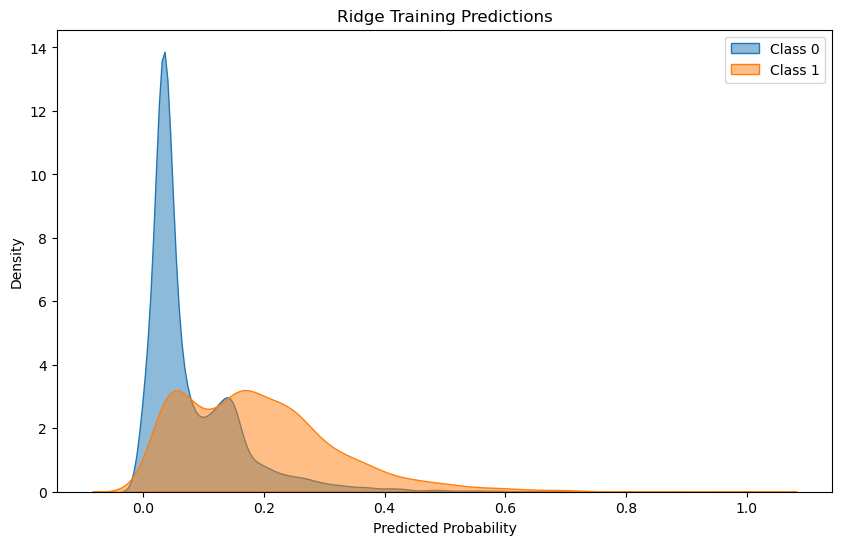

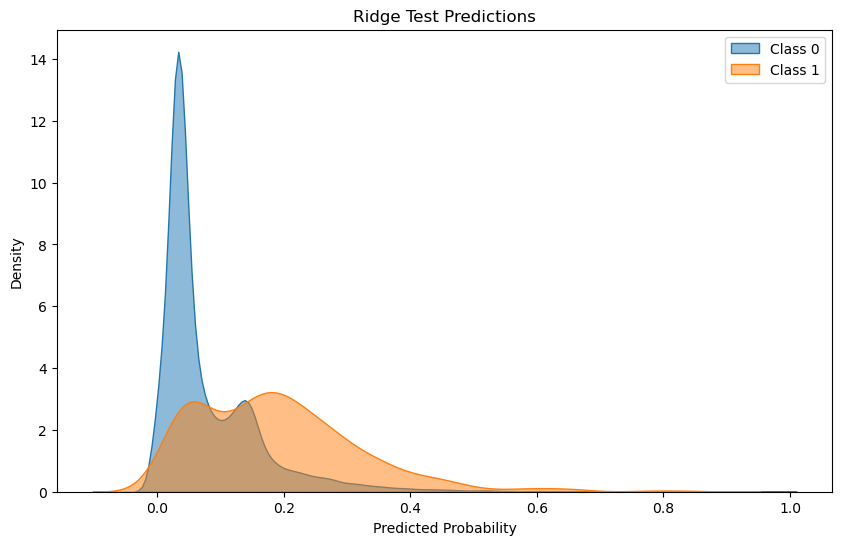

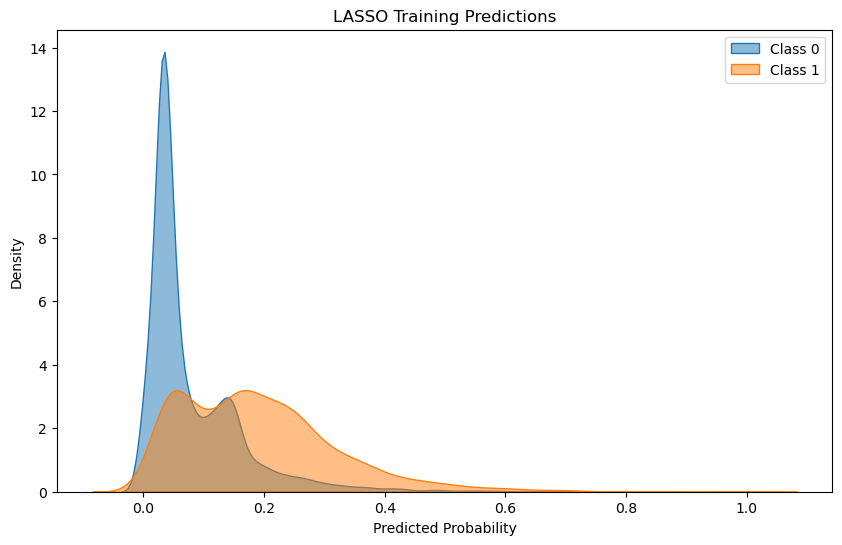

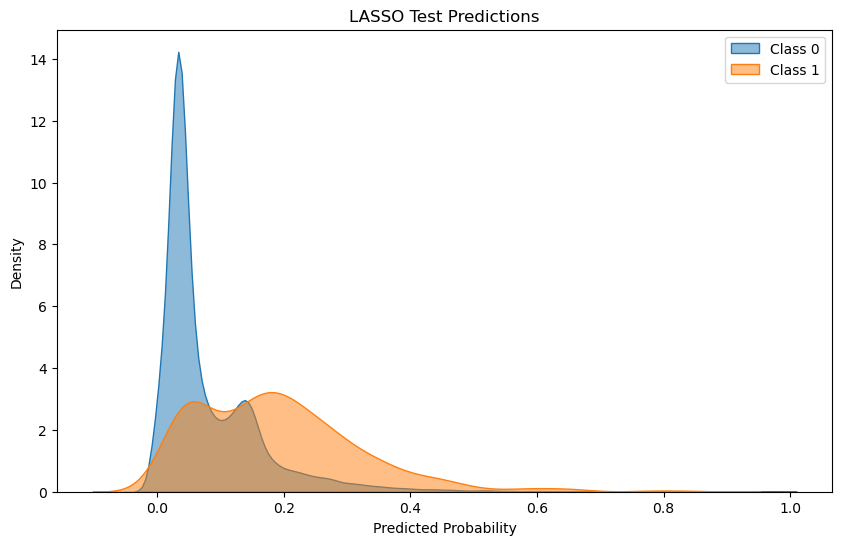

In [30]:
# seaborn kde plot
# Plotting KDE plots with Seaborn
import seaborn as sns
def plot_kde(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    for class_val in np.unique(y_true):
        sns.kdeplot(y_pred[y_true == class_val], 
                   label=f'Class {class_val}',
                   fill=True,  # Optional: fills the area under the curve
                   alpha=0.5)
    plt.title(title)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Create KDE plots
plot_kde(y_train_under, ridge_train_pred, 'Ridge Training Predictions')
plot_kde(y_test, ridge_test_pred, 'Ridge Test Predictions')
plot_kde(y_train_under, lasso_train_pred, 'LASSO Training Predictions')
plot_kde(y_test, lasso_test_pred, 'LASSO Test Predictions')

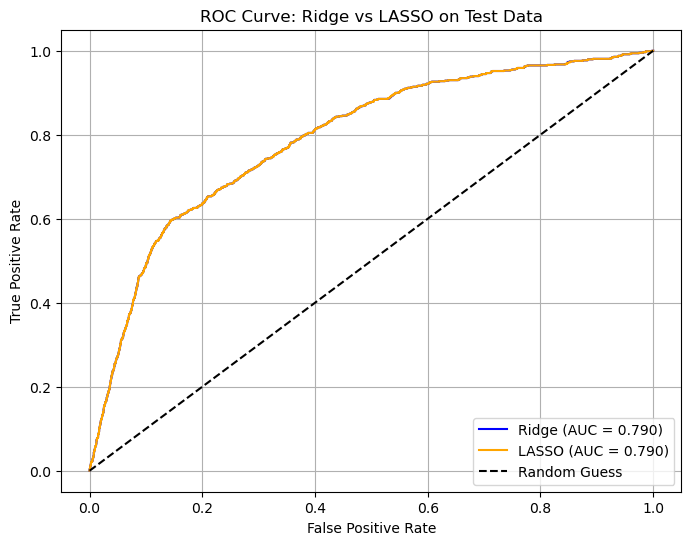

In [31]:
# ROC Plot for LASSO and Ridge
# Add ROC plot here
from sklearn.metrics import roc_curve, auc

fpr_ridge, tpr_ridge, _ = roc_curve(y_test, ridge_test_pred)
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, lasso_test_pred)

auc_ridge = auc(fpr_ridge, tpr_ridge)
auc_lasso = auc(fpr_lasso, tpr_lasso)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge (AUC = {auc_ridge:.3f})', color='blue')
plt.plot(fpr_lasso, tpr_lasso, label=f'LASSO (AUC = {auc_lasso:.3f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Ridge vs LASSO on Test Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
